In [85]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline 
from numpy.polynomial.polynomial import polyfit
import scipy.stats as st
import random 


# Read in CSV File
cases_df = pd.read_csv("output_data/owid_clean.csv")

# Set DataFrame IndexPreview CSV file
cases_df.set_index("location")

,date,new_cases,new_deaths,total_cases,total_deaths
location,,,,,
Brazil,2019-12-31,0.0,0.0,NaN,NaN
Brazil,2020-01-01,0.0,0.0,NaN,NaN
Brazil,2020-01-02,0.0,0.0,NaN,NaN
Brazil,2020-01-03,0.0,0.0,NaN,NaN
Brazil,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
United States,2020-10-24,85329.0,953.0,8493669.0,223995.0
United States,2020-10-25,83056.0,904.0,8576725.0,224899.0
United States,2020-10-26,59440.0,331.0,8636165.0,225230.0


In [86]:
# convert object to datetime
cases_df['date'] = pd.to_datetime(cases_df['date'], format='%Y-%m-%d')
cases_df.dtypes

date            datetime64[ns]
location                object
new_cases              float64
new_deaths             float64
total_cases            float64
total_deaths           float64
dtype: object

# Countries' Total Cases 

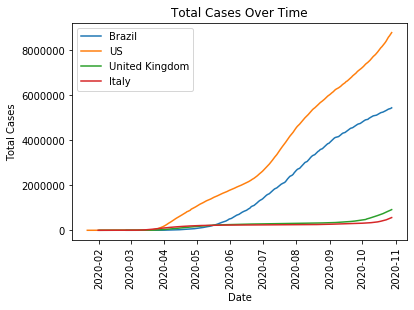

In [87]:
cases_df.set_index('location')

fig, ax = plt.subplots()

brazil = cases_df.loc[cases_df['location']=='Brazil']
ax.plot(brazil['date'],brazil['total_cases'], label = 'Brazil')

us = cases_df.loc[cases_df['location']=='United States']
ax.plot(us['date'],us['total_cases'],label='US')

uk = cases_df.loc[cases_df['location']=='United Kingdom']
ax.plot(uk['date'],uk['total_cases'],label='United Kingdom')

italy = cases_df.loc[cases_df['location']=='Italy']
ax.plot(italy['date'],italy['total_cases'],label='Italy')

plt.xticks(rotation='vertical')
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

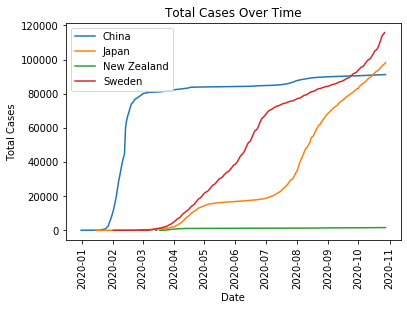

In [88]:
fig, ax = plt.subplots()

china = cases_df.loc[cases_df['location']=='China']
ax.plot(china['date'],china['total_cases'],label='China')

japan = cases_df.loc[cases_df['location']=='Japan']
ax.plot(japan['date'],japan['total_cases'],label='Japan')

nz = cases_df.loc[cases_df['location']=='New Zealand']
ax.plot(nz['date'],nz['total_cases'],label='New Zealand')

sweden = cases_df.loc[cases_df['location']=='Sweden']
ax.plot(sweden['date'],sweden['total_cases'],label='Sweden')

plt.xticks(rotation='vertical')
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

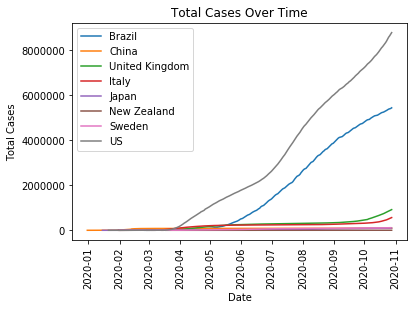

In [89]:
fig, ax = plt.subplots()

brazil = cases_df.loc[cases_df['location']=='Brazil']
ax.plot(brazil['date'],brazil['total_cases'], label = 'Brazil')

china = cases_df.loc[cases_df['location']=='China']
ax.plot(china['date'],china['total_cases'],label='China')

uk = cases_df.loc[cases_df['location']=='United Kingdom']
ax.plot(uk['date'],uk['total_cases'],label='United Kingdom')

italy = cases_df.loc[cases_df['location']=='Italy']
ax.plot(italy['date'],italy['total_cases'],label='Italy')

japan = cases_df.loc[cases_df['location']=='Japan']
ax.plot(japan['date'],japan['total_cases'],label='Japan')

nz = cases_df.loc[cases_df['location']=='New Zealand']
ax.plot(nz['date'],nz['total_cases'],label='New Zealand')

sweden = cases_df.loc[cases_df['location']=='Sweden']
ax.plot(sweden['date'],sweden['total_cases'],label='Sweden')

us = cases_df.loc[cases_df['location']=='United States']
ax.plot(us['date'],us['total_cases'],label='US')

plt.xticks(rotation='vertical')
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# Countries' Total Deaths

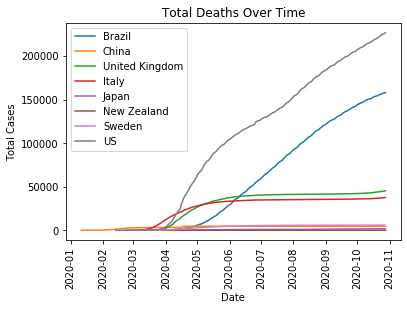

In [90]:
fig, ax = plt.subplots()

brazil = cases_df.loc[cases_df['location']=='Brazil']
ax.plot(brazil['date'],brazil['total_deaths'], label = 'Brazil')

china = cases_df.loc[cases_df['location']=='China']
ax.plot(china['date'],china['total_deaths'],label='China')

uk = cases_df.loc[cases_df['location']=='United Kingdom']
ax.plot(uk['date'],uk['total_deaths'],label='United Kingdom')

italy = cases_df.loc[cases_df['location']=='Italy']
ax.plot(italy['date'],italy['total_deaths'],label='Italy')

japan = cases_df.loc[cases_df['location']=='Japan']
ax.plot(japan['date'],japan['total_deaths'],label='Japan')

nz = cases_df.loc[cases_df['location']=='New Zealand']
ax.plot(nz['date'],nz['total_deaths'],label='New Zealand')

sweden = cases_df.loc[cases_df['location']=='Sweden']
ax.plot(sweden['date'],sweden['total_deaths'],label='Sweden')

us = cases_df.loc[cases_df['location']=='United States']
ax.plot(us['date'],us['total_deaths'],label='US')

plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

In [91]:
# countrymeters.info --> total populations as of Jan 1, 2020.
braz_pop = 212559417
china_pop = 1408526449
ital_pop = 60005743
jp_pop = 125938348
nz_pop = 4822233
swe_pop = 10151866
uk_pop = 66575226
us_pop = 330380000

In [92]:
### CASES BY PERCENTAGE OF COUNTRIES POPULATION ###
pops = (212559417, 1408526449, 60005743, 125938348, 4822233, 10151866, 66575226, 330380000)

last_df = cases_df.loc[cases_df['date']=='2020-10-27']

last_df["total_pop"] = pops
last_df = last_df.set_index('location')
last_df

/opt/anaconda3/envs/PythonData1/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,new_cases,new_deaths,total_cases,total_deaths,total_pop
location,,,,,,
Brazil,2020-10-27,15726.0,263.0,5409854.0,157397.0,212559417
China,2020-10-27,24.0,0.0,91175.0,4739.0,1408526449
Italy,2020-10-27,17007.0,141.0,542789.0,37479.0,60005743
Japan,2020-10-27,424.0,7.0,97498.0,1725.0,125938348
New Zealand,2020-10-27,1.0,0.0,1585.0,25.0,4822233
Sweden,2020-10-27,922.0,1.0,115785.0,5918.0,10151866
United Kingdom,2020-10-27,20890.0,102.0,894690.0,44998.0,66575226
United States,2020-10-27,68359.0,505.0,8704524.0,225735.0,330380000


In [93]:
last_df

perc_cases = (last_df["total_cases"]/last_df["total_pop"])
perc_cases

perc_deaths = (last_df["total_deaths"]/last_df["total_pop"])
perc_deaths


perc_summary = pd.DataFrame({'Percent Infected':perc_cases, 'Percent Deceased':perc_deaths})
perc_summary.style.format({"Percent Infected":"{:.6%}", "Percent Deceased":"{:.6%}"})

,Percent Infected,Percent Deceased
location,,
Brazil,2.545102%,0.074048%
China,0.006473%,0.000336%
Italy,0.904562%,0.062459%
Japan,0.077417%,0.001370%
New Zealand,0.032869%,0.000518%
Sweden,1.140529%,0.058295%
United Kingdom,1.343878%,0.067590%
United States,2.634701%,0.068326%


In [94]:
### DEATH BY PERCENTAGE OF COUNTRIES POPULATION ###
